In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


## Loading useful modules and local scripts

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo
import json

from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import scripts.OxcalReader as ox

In [10]:
pyleo.set_style('journal')  # set the visual style

In [12]:
ages = ox.LoadFile('data/age_model/IntCal20_KDE_Models_Phases_NE_Adriatic.js')

In [13]:
names = []

for n,elem in enumerate(ages['ocd']):
    try:
        names.append({elem['name']:n})
    except:
        continue
names

[{'M17_KDE': 1},
 {'M17_KDE_Kernel': 2},
 {'M17_KDE_Scale': 3},
 {'': 4},
 {'start': 5},
 {'M17_deep': 6},
 {'MIG7': 7},
 {'MIG8': 8},
 {'MIG9': 9},
 {'MIG10': 10},
 {'MIG1': 11},
 {'MIG2': 12},
 {'MIG3': 13},
 {'MIG4': 14},
 {'MIG5': 15},
 {'MIG6': 16},
 {'MIG18': 17},
 {'MIG19': 18},
 {'MIGC1': 19},
 {'MIGC2': 20},
 {'MIGC4': 21},
 {'MIGC6': 22},
 {'MIG11': 23},
 {'end': 24},
 {'Hundalm_KDE': 25},
 {'Hundalm_KDE_Kernel': 26},
 {'Hundalm_KDE_Scale': 27},
 {'': 28},
 {'start': 29},
 {'Hundalm I': 30},
 {'H14': 31},
 {'I/II': 32},
 {'Hundalm II': 33},
 {'H19': 34},
 {'H20': 35},
 {'H21': 36},
 {'H-I': 37},
 {'II/III': 38},
 {'Hundalm III': 39},
 {'H1': 40},
 {'H2': 41},
 {'H3': 42},
 {'H12': 43},
 {'H13': 44},
 {'H16': 45},
 {'H17': 46},
 {'H18': 47},
 {'H22': 48},
 {'H23': 49},
 {'H25': 50},
 {'H26': 51},
 {'H27': 52},
 {'H28': 53},
 {'end': 54},
 {'Kugina_KDE': 55},
 {'Kugina_KDE_Kernel': 56},
 {'Kugina_KDE_Scale': 57},
 {'': 58},
 {'start': 59},
 {'Kugina': 60},
 {'KG1': 61},
 {'KG2'

In [14]:
migovec = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(7,24)}
hu_list = [31]+list(range(34,38))+list(range(40,54))
hundalm = {ages['ocd'][n]['name']:ages['ocd'][n] for n in hu_list}
kugina = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(61,65)}
vukusic = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(72,74)}
z = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(82,85)}

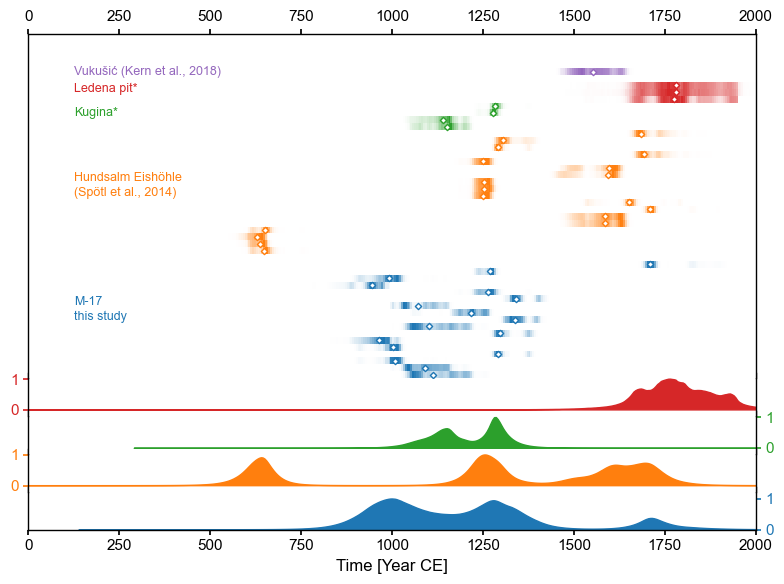

Figure saved at: "outputs/f08.pdf"
Figure saved at: "../reports/M17_manuscript/figures/f08.pdf"


In [16]:
fig = plt.figure(figsize = (8,6))

gs = GridSpec(5, 1, height_ratios=[8, 1, 1, 1, 1])

for j,n in enumerate((1,25,55,75)):
    c ='C{}'.format(j)
    kde = ages['ocd'][n]
    axi = plt.subplot(gs[4-j])
    
    s_plot,s_med = ox.FillBetween(axi,kde,color = c)
    
    
    axi.set_xlim(0,2000)
    
    axi.set_yticks([0,1])
    axi.grid()
    axi.spines['right'].set_visible(True)
    if j !=0:
        axi.set_ylim(-0.2,1.2)
        axi.spines['bottom'].set_visible(False)
        axi.set_xticks([])
    else:
        axi.set_ylim(0,1.4)
        axi.spines['bottom'].set_visible(True)
        axi.set_xlabel("Time [Year CE]")
    if (j % 2) == 0:
        axi.yaxis.tick_right()
        
    axi.yaxis.label.set_color(c)
    axi.tick_params(axis='y', colors=c)

axRect = plt.subplot(gs[0])
carryover = 0

caves = ["M-17\nthis study","Hundsalm Eishöhle\n(Spötl et al., 2014)","Kugina*","Ledena pit*","Vukušić (Kern et al., 2018)"]

for i, cave in enumerate((migovec,hundalm,kugina,z,vukusic)):
    
    # color
    c = 'C{}'.format(i)
    
    # migovec rectangles
    for n, elem in enumerate(cave):
        d = ox.MakeRects(axRect,cave[elem],carryover+n,facecolor = c)

    # medians
    medians = [cave[elem]['posterior']['median'] for elem in cave]
    axRect.scatter(medians,np.arange(carryover,carryover+len(cave))+0.5,facecolor = 'white',edgecolor=c,zorder = 100,marker = 'D',s=10)
    
    # write the name of the cave
    axRect.text(125,(carryover+carryover+len(cave))/2,caves[i],color = c,fontsize=9)

    # min strat
    carryover +=len(cave)

    
    
axRect.set_xlim(0,2000)
axRect.set_ylim(0,50) 
axRect.grid([])
axRect.set_yticks([])
axRect.xaxis.set_ticks_position('top')

axRect.spines['right'].set_visible(True)
axRect.spines['bottom'].set_visible(False)
axRect.spines['top'].set_visible(True)

plt.tight_layout()
plt.subplots_adjust(hspace =-0.05)


pyleo.showfig(fig)
pyleo.savefig(fig,path='outputs/f08.pdf',settings={"dpi":300})
pyleo.savefig(fig,path='../reports/M17_manuscript/figures/f08.pdf',settings={"dpi":300})
pyleo.closefig()